<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Stock-Market-Predicting-with-LSTM/blob/main/LSTM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data:
link: https://www.kaggle.com/mohamedbakrey/eda-for-microsoft-stock-data-using-ml-algo-acc100/data


In [2]:
df=pd.read_csv('/content/drive/MyDrive/MachineLearning/RNN_Proj/MSFT.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061608,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063809,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064909,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063258,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062158,47894400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8929 entries, 0 to 8928
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8929 non-null   object 
 1   Open       8929 non-null   float64
 2   High       8929 non-null   float64
 3   Low        8929 non-null   float64
 4   Close      8929 non-null   float64
 5   Adj Close  8929 non-null   float64
 6   Volume     8929 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 488.4+ KB


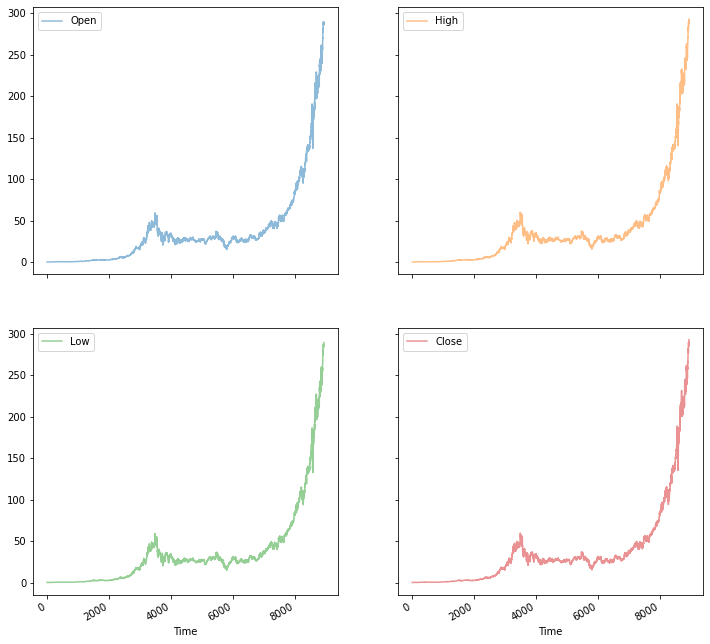

In [20]:
df.drop(columns=['Date','Adj Close','Volume']).plot(kind='line',alpha=.5,subplots=True,figsize=(12,12),xlabel='Time',layout=(2,2),sharey=True);

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8.929000e+03
mean,36.696204,37.086905,36.303615,36.708883,31.725479,5.924097e+07
std,48.535537,49.003019,48.067117,48.569096,48.770407,3.856559e+07
min,0.088542,0.092014,0.088542,0.090278,0.057208,2.304000e+06
25%,3.906250,3.953125,3.859375,3.910156,2.477817,3.526450e+07
50%,26.680000,26.950001,26.375000,26.660000,18.773018,5.248800e+07
75%,37.650002,37.980000,37.299999,37.610001,27.902052,7.308670e+07
max,289.750000,292.899994,289.299988,292.850006,292.850006,1.031789e+09


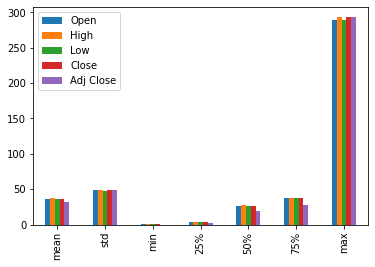

In [26]:
df.drop(columns='Volume').describe().drop('count').plot(kind='bar');

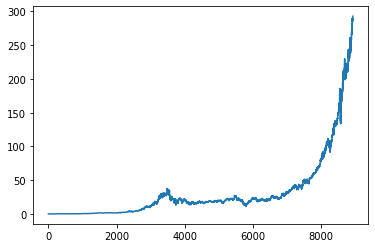

In [ ]:
df['Adj Close'].plot()

#Scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc=MinMaxScaler()

In [ ]:
x=sc.fit_transform(df.drop(columns=['Date','Close','Adj Close']))

In [ ]:
x.shape

(8929, 4)

In [ ]:
y=df['Adj Close']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
t_split=TimeSeriesSplit(n_splits=10)

In [ ]:
for train_index , test_index in t_split.split(x):
  # print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [ ]:
print(x_train.shape, y_train.shape)

(8118, 4) (8118,)


In [ ]:
print(x_test.shape, y_test.shape)

(811, 4) (811,)


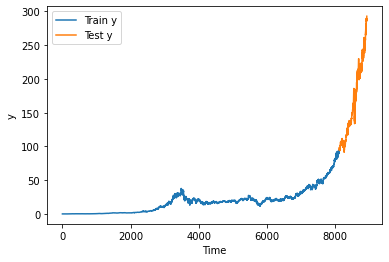

In [ ]:
plt.plot(y_train,label='Train y')
plt.plot(y_test, label='Test y')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show();

In [ ]:
((811)/8929)*100 # 10% of series for test

9.082764027326688

##Reshape Data:

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test=x_test.reshape(x_test.shape[0],1,x_test.shape[1])

#LSTM Model

In [ ]:
from keras.models import  Sequential
from keras.layers import  Dense, LSTM

In [ ]:
x_train.shape

(8118, 1, 4)

In [ ]:
Model=Sequential()
Model.add(LSTM(32,input_shape=(1,x_train.shape[2]),activation='relu',return_sequences=False))
Model.add(Dense(1,activation='linear'))

In [ ]:
Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                4736      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Model.compile(optimizer='adam',loss='mean_absolute_error')

In [ ]:
hist=Model.fit(x_train,y_train,epochs=100, batch_size=8,shuffle=False)

Epoch 1/100
1015/1015 [==============================] - 3s 1ms/step - loss: 4.0018
Epoch 2/100
1015/1015 [==============================] - 2s 2ms/step - loss: 7.2123
Epoch 3/100
1015/1015 [==============================] - 2s 2ms/step - loss: 5.4749
Epoch 4/100
1015/1015 [==============================] - 2s 1ms/step - loss: 3.2541
Epoch 5/100
1015/1015 [==============================] - 2s 2ms/step - loss: 1.3335
Epoch 6/100
1015/1015 [==============================] - 2s 2ms/step - loss: 0.7710
Epoch 7/100
1015/1015 [==============================] - 1s 1ms/step - loss: 0.6501
Epoch 8/100
1015/1015 [==============================] - 1s 1ms/step - loss: 0.6003
Epoch 9/100
1015/1015 [==============================] - 1s 1ms/step - loss: 0.5829
Epoch 10/100
1015/1015 [==============================] - 2s 1ms/step - loss: 0.5788
Epoch 11/100
1015/1015 [==============================] - 1s 1ms/step - loss: 0.5798
Epoch 12/100
1015/1015 [==============================] - 1s 1ms/step - lo

#Visualization of results:

In [ ]:
y_pred=Model.predict(x_test)

In [ ]:
len(y_test)

811

In [ ]:
Time=[]
for i in range(len(y_test)):
  Time.append(i)

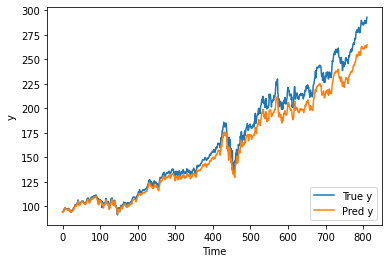

In [ ]:
plt.plot(Time,y_test,label='True y')
plt.plot(y_pred, label='Pred y')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show();

In [ ]:
Time=[]
for i in range(len(y_train),len(y_train)+len(y_test)):
  Time.append(i)

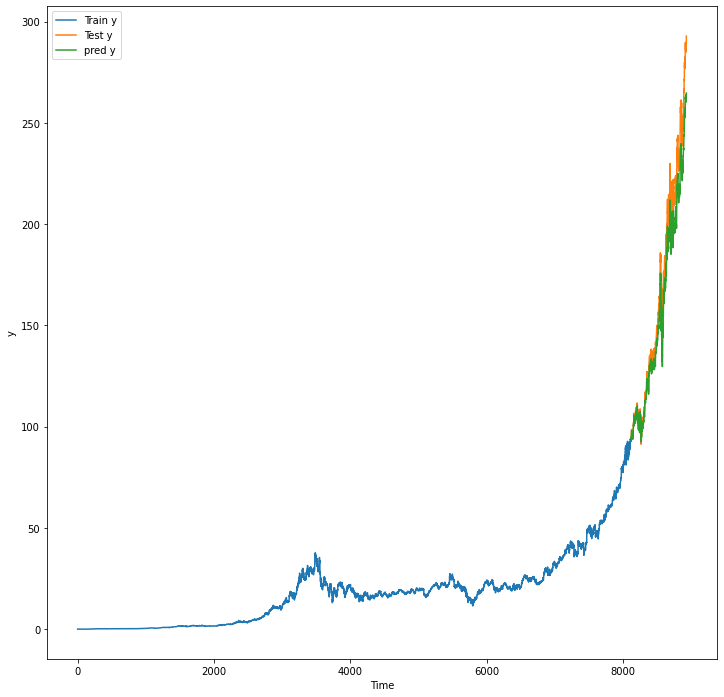

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(y_train,label='Train y')
plt.plot(Time,y_test, label='Test y')
plt.plot(Time,y_pred, label='pred y')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show();